# 使用非监督式学习进行数据流的异常检测

非监督式学习在异常检测方面十分重要。因为攻击方式在不断更新，需要一个可以迭代的模型，能够对对未知入侵作出反应。本次实验是以Autoencoder为主体，以正常、安全的数据包为训练集，建立非监督学习模型，对不能够还原（编码、解码）的异常数据进行检查。

数据集为NSL-KDD，本次实验提取的是其中TCP协议下的数据包，带有53600条普通数据报文以及11038条攻击报文。数据集下载地址：https://www.unb.ca/cic/datasets/nsl.html

## 第一部分：预处理

In [4]:
%run PreProcessing.py

The keys list on the position 2: ['ftp_data', 'http', 'telnet', 'smtp', 'finger', 'ftp', 'time', 'other', 'auth', 'shell', 'pop_3', 'IRC', 'domain', 'X11', 'private', 'imap4', 'ssh', 'link', 'remote_job', 'ldap', 'courier', 'discard', 'mtp', 'systat', 'iso_tsap', 'csnet_ns', 'uucp', 'whois', 'netbios_ns', 'Z39_50', 'sunrpc', 'netbios_dgm', 'uucp_path', 'vmnet', 'name', 'pop_2', 'http_443', 'login', 'gopher', 'exec', 'kshell', 'sql_net', 'hostnames', 'echo', 'daytime', 'pm_dump', 'netstat', 'ctf', 'nntp', 'netbios_ssn', 'supdup', 'bgp', 'nnsp', 'rje', 'printer', 'efs', 'klogin']
The keys list on the position 3: ['SF', 'REJ', 'RSTO', 'S0', 'S1', 'RSTR', 'S3', 'S2', 'OTH', 'SH', 'RSTOS0']


数据的预处理：去掉冗余字段，将训练数据映射至0到1区间，使得训练可以更好收敛。

值得注意的是，实验为了模拟未来可能出现的场景（模型在云端不断抓取正常数据进行更新，而入侵数据形式是未知的），对测试数据除以的是训练数据的最大值。也就是说，测试数据并不保证在0到1的区间。

## 第二部分：自动解码器Autoencoder

 首先使用整个正常数据集进行训练，目的是验证实验可行性。

In [1]:
%run NSL_KDD_AE_V2.py

Using TensorFlow backend.






------------------------------
Loading and preprocessing train data...
------------------------------



C:\Users\83625\DataIDPS\Autoencoder\NSL_KDD_AE_V2.py:69: RuntimeWarning: invalid value encountered in true_divide
  pack_train = pack_train / np.max(pack_train, axis=0)



Train on 42880 samples, validate on 10720 samples
Epoch 1/5000
42880/42880 [==============================] - 3s 80us/step - loss: 0.0360 - val_loss: 0.0061
Epoch 2/5000
42880/42880 [==============================] - 1s 32us/step - loss: 0.0043 - val_loss: 0.0036
Epoch 3/5000
42880/42880 [==============================] - 1s 32us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 4/5000
42880/42880 [==============================] - 1s 33us/step - loss: 0.0029 - val_loss: 0.0025
Epoch 5/5000
42880/42880 [==============================] - 1s 32us/step - loss: 0.0021 - val_loss: 0.0017
Epoch 6/5000
42880/42880 [==============================] - 1s 32us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/5000
42880/42880 [==============================] - 1s 32us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/5000
42880/42880 [==============================] - 1s 32us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/5000
42880/42880 [==============================] - 1s 32us/step - loss: 9.5135e-04 -

42880/42880 [==============================] - 1s 32us/step - loss: 1.2022e-04 - val_loss: 1.2945e-04
Epoch 141/5000
42880/42880 [==============================] - 1s 32us/step - loss: 1.2030e-04 - val_loss: 1.3629e-04
Epoch 142/5000
42880/42880 [==============================] - 1s 31us/step - loss: 1.1930e-04 - val_loss: 1.2290e-04
Epoch 143/5000
42880/42880 [==============================] - 1s 31us/step - loss: 1.1916e-04 - val_loss: 1.2632e-04
Epoch 144/5000
42880/42880 [==============================] - 1s 31us/step - loss: 1.1766e-04 - val_loss: 1.2304e-04
Epoch 145/5000
42880/42880 [==============================] - 1s 31us/step - loss: 1.1904e-04 - val_loss: 1.3108e-04
Epoch 146/5000
42880/42880 [==============================] - 1s 31us/step - loss: 1.1912e-04 - val_loss: 1.2481e-04
Epoch 147/5000
42880/42880 [==============================] - 1s 33us/step - loss: 1.1768e-04 - val_loss: 1.2634e-04
Epoch 148/5000
42880/42880 [==============================] - 1s 31us/step - lo

Epoch 280/5000
42880/42880 [==============================] - 1s 31us/step - loss: 9.5664e-05 - val_loss: 1.1198e-04
Epoch 281/5000
42880/42880 [==============================] - 1s 31us/step - loss: 9.4816e-05 - val_loss: 1.1041e-04
Epoch 282/5000
42880/42880 [==============================] - 1s 32us/step - loss: 9.6750e-05 - val_loss: 1.1220e-04
Epoch 283/5000
42880/42880 [==============================] - 1s 32us/step - loss: 9.4913e-05 - val_loss: 1.0901e-04
Epoch 284/5000
42880/42880 [==============================] - 1s 32us/step - loss: 9.5417e-05 - val_loss: 1.0724e-04
Epoch 285/5000
42880/42880 [==============================] - 1s 32us/step - loss: 9.5932e-05 - val_loss: 1.1389e-04
Epoch 286/5000
42880/42880 [==============================] - 1s 32us/step - loss: 9.5450e-05 - val_loss: 1.0746e-04
Epoch 287/5000
42880/42880 [==============================] - 1s 32us/step - loss: 9.4785e-05 - val_loss: 1.0869e-04
Epoch 288/5000
42880/42880 [==============================] - 1s

42880/42880 [==============================] - 1s 32us/step - loss: 8.8674e-05 - val_loss: 1.0843e-04
Epoch 351/5000
42880/42880 [==============================] - 1s 31us/step - loss: 8.8483e-05 - val_loss: 1.0172e-04
Epoch 352/5000
42880/42880 [==============================] - 1s 31us/step - loss: 9.2828e-05 - val_loss: 1.0737e-04
Epoch 353/5000
42880/42880 [==============================] - 1s 31us/step - loss: 8.9119e-05 - val_loss: 1.0198e-04
Epoch 354/5000
42880/42880 [==============================] - 1s 31us/step - loss: 8.7774e-05 - val_loss: 1.1088e-04
Epoch 355/5000
42880/42880 [==============================] - 1s 31us/step - loss: 8.8170e-05 - val_loss: 1.0554e-04
Epoch 356/5000
42880/42880 [==============================] - 1s 31us/step - loss: 8.8636e-05 - val_loss: 1.0143e-04
Epoch 357/5000
42880/42880 [==============================] - 1s 31us/step - loss: 8.9286e-05 - val_loss: 1.0168e-04
Epoch 358/5000
42880/42880 [==============================] - 1s 31us/step - lo

42880/42880 [==============================] - 1s 31us/step - loss: 8.2425e-05 - val_loss: 1.0295e-04
Epoch 491/5000
42880/42880 [==============================] - 1s 32us/step - loss: 8.3914e-05 - val_loss: 9.6195e-05
Epoch 492/5000
42880/42880 [==============================] - 1s 32us/step - loss: 8.1079e-05 - val_loss: 9.3239e-05
Epoch 493/5000
42880/42880 [==============================] - 1s 31us/step - loss: 8.2378e-05 - val_loss: 9.3474e-05
Epoch 494/5000
42880/42880 [==============================] - 1s 31us/step - loss: 8.2029e-05 - val_loss: 9.5135e-05
Epoch 495/5000
42880/42880 [==============================] - 1s 30us/step - loss: 8.1901e-05 - val_loss: 9.4116e-05
Epoch 496/5000
42880/42880 [==============================] - 1s 31us/step - loss: 8.1797e-05 - val_loss: 9.4774e-05
Epoch 497/5000
42880/42880 [==============================] - 1s 32us/step - loss: 8.1385e-05 - val_loss: 9.2086e-05
Epoch 498/5000
42880/42880 [==============================] - 1s 32us/step - lo

42880/42880 [==============================] - 1s 31us/step - loss: 7.6592e-05 - val_loss: 8.9502e-05
Epoch 631/5000
42880/42880 [==============================] - 1s 31us/step - loss: 7.5888e-05 - val_loss: 8.7478e-05
Epoch 632/5000
42880/42880 [==============================] - 1s 32us/step - loss: 7.6695e-05 - val_loss: 8.6398e-05
Epoch 633/5000
42880/42880 [==============================] - 1s 31us/step - loss: 7.6352e-05 - val_loss: 8.6241e-05
Epoch 634/5000
42880/42880 [==============================] - 1s 31us/step - loss: 7.6346e-05 - val_loss: 8.6790e-05
Epoch 635/5000
42880/42880 [==============================] - 1s 31us/step - loss: 7.7230e-05 - val_loss: 8.8649e-05
Epoch 636/5000
42880/42880 [==============================] - 1s 32us/step - loss: 7.7338e-05 - val_loss: 8.8463e-05
Epoch 637/5000
42880/42880 [==============================] - 1s 31us/step - loss: 7.7023e-05 - val_loss: 8.7531e-05
Epoch 638/5000
42880/42880 [==============================] - 1s 32us/step - lo

C:\Users\83625\DataIDPS\Autoencoder\NSL_KDD_AE_V2.py:95: RuntimeWarning: invalid value encountered in true_divide
  pack_attack = pack_attack / np.max(pack_attack, axis=0)


53600/53600 [==============================] - 1s 21us/step
L2 loss of Attack Packs: {'mean': 0.6795025582222834, 'std': 1.082768638995405, 'max': 4.387752791166377, 'min': 0.00045515118283426535}
L2 Loss of Normal Packs: {'mean': 0.00299856907399672, 'std': 0.024648300730335262, 'max': 1.9500067300648791, 'min': 1.60817596375893e-05}


可以见到，当Autoencoder训练收敛后，对原数据可以还原，而对攻击数据则不能。（或有很大的L2 loss）

实验时间：2019/10/17 9:48

进一步进行实验，这次则是分出部分正常数据加入测试集。实验再一次验证了异常数据（或者说攻击数据）是无法被收敛的Autoencoder还原的。

In [1]:
%run NSL_KDD_AE_V2.py

Using TensorFlow backend.






------------------------------
Loading and preprocessing train data...
------------------------------



C:\Users\83625\DataIDPS\Autoencoder\NSL_KDD_AE_V2.py:78: RuntimeWarning: invalid value encountered in true_divide
  pack_train = pack_train / pack_max
C:\Users\83625\DataIDPS\Autoencoder\NSL_KDD_AE_V2.py:82: RuntimeWarning: invalid value encountered in true_divide
  pack_test = pack_test / pack_max



Train on 34049 samples, validate on 8513 samples
Epoch 1/5000
34049/34049 [==============================] - 3s 81us/step - loss: 0.0578 - val_loss: 0.0123
Epoch 2/5000
34049/34049 [==============================] - 1s 32us/step - loss: 0.0083 - val_loss: 0.0062
Epoch 3/5000
34049/34049 [==============================] - 1s 32us/step - loss: 0.0047 - val_loss: 0.0037
Epoch 4/5000
34049/34049 [==============================] - 1s 32us/step - loss: 0.0035 - val_loss: 0.0030
Epoch 5/5000
34049/34049 [==============================] - 1s 32us/step - loss: 0.0028 - val_loss: 0.0023
Epoch 6/5000
34049/34049 [==============================] - 1s 32us/step - loss: 0.0022 - val_loss: 0.0020
Epoch 7/5000
34049/34049 [==============================] - 1s 32us/step - loss: 0.0019 - val_loss: 0.0017
Epoch 8/5000
34049/34049 [==============================] - 1s 32us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/5000
34049/34049 [==============================] - 1s 32us/step - loss: 0.0013 - val_

34049/34049 [==============================] - 1s 31us/step - loss: 2.3389e-04 - val_loss: 2.8961e-04
Epoch 71/5000
34049/34049 [==============================] - 1s 32us/step - loss: 2.3380e-04 - val_loss: 2.4908e-04
Epoch 72/5000
34049/34049 [==============================] - 1s 33us/step - loss: 2.2830e-04 - val_loss: 2.5370e-04
Epoch 73/5000
34049/34049 [==============================] - 1s 32us/step - loss: 2.2775e-04 - val_loss: 2.6438e-04
Epoch 74/5000
34049/34049 [==============================] - 1s 31us/step - loss: 2.2600e-04 - val_loss: 2.3694e-04
Epoch 75/5000
34049/34049 [==============================] - 1s 32us/step - loss: 2.2476e-04 - val_loss: 2.7236e-04
Epoch 76/5000
34049/34049 [==============================] - 1s 31us/step - loss: 2.2370e-04 - val_loss: 2.8150e-04
Epoch 77/5000
34049/34049 [==============================] - 1s 32us/step - loss: 2.2403e-04 - val_loss: 2.3553e-04
Epoch 78/5000
34049/34049 [==============================] - 1s 33us/step - loss: 2.16

34049/34049 [==============================] - 1s 31us/step - loss: 1.6701e-04 - val_loss: 2.7982e-04
Epoch 141/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.6782e-04 - val_loss: 1.8805e-04
Epoch 142/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.6225e-04 - val_loss: 2.0807e-04
Epoch 143/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.6626e-04 - val_loss: 1.9570e-04
Epoch 144/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.6320e-04 - val_loss: 1.8919e-04
Epoch 145/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.6156e-04 - val_loss: 1.8914e-04
Epoch 146/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.6235e-04 - val_loss: 2.0876e-04
Epoch 147/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.6817e-04 - val_loss: 1.8263e-04
Epoch 148/5000
34049/34049 [==============================] - 1s 33us/step - lo

Epoch 210/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.5562e-04 - val_loss: 2.2314e-04
Epoch 211/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.4475e-04 - val_loss: 1.6387e-04
Epoch 212/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.3962e-04 - val_loss: 1.9076e-04
Epoch 213/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.4240e-04 - val_loss: 1.7767e-04
Epoch 214/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.4026e-04 - val_loss: 1.8843e-04
Epoch 215/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.3934e-04 - val_loss: 1.6351e-04
Epoch 216/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.3792e-04 - val_loss: 1.7479e-04
Epoch 217/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.3900e-04 - val_loss: 1.8651e-04
Epoch 218/5000
34049/34049 [==============================] - 1s

34049/34049 [==============================] - 1s 32us/step - loss: 1.1535e-04 - val_loss: 1.4003e-04
Epoch 281/5000
34049/34049 [==============================] - 1s 33us/step - loss: 1.1212e-04 - val_loss: 1.4570e-04
Epoch 282/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.1112e-04 - val_loss: 1.3897e-04
Epoch 283/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.1071e-04 - val_loss: 1.5560e-04
Epoch 284/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.1013e-04 - val_loss: 1.4764e-04
Epoch 285/5000
34049/34049 [==============================] - 1s 32us/step - loss: 1.1075e-04 - val_loss: 1.4559e-04
Epoch 286/5000
34049/34049 [==============================] - 1s 31us/step - loss: 1.0930e-04 - val_loss: 1.3788e-04
Epoch 287/5000
34049/34049 [==============================] - 1s 33us/step - loss: 1.0919e-04 - val_loss: 1.3994e-04
Epoch 288/5000
34049/34049 [==============================] - 1s 32us/step - lo

34049/34049 [==============================] - 1s 32us/step - loss: 9.4633e-05 - val_loss: 1.7223e-04
Epoch 351/5000
34049/34049 [==============================] - 1s 33us/step - loss: 1.0594e-04 - val_loss: 1.5920e-04
Epoch 352/5000
34049/34049 [==============================] - 1s 30us/step - loss: 9.5429e-05 - val_loss: 1.2950e-04
Epoch 353/5000
34049/34049 [==============================] - 1s 31us/step - loss: 9.3698e-05 - val_loss: 1.4726e-04
Epoch 354/5000
34049/34049 [==============================] - 1s 31us/step - loss: 9.4190e-05 - val_loss: 1.2662e-04
Epoch 355/5000
34049/34049 [==============================] - 1s 33us/step - loss: 9.2956e-05 - val_loss: 1.6313e-04
Epoch 356/5000
34049/34049 [==============================] - 1s 32us/step - loss: 9.6506e-05 - val_loss: 1.3166e-04
Epoch 357/5000
34049/34049 [==============================] - 1s 32us/step - loss: 9.3159e-05 - val_loss: 1.8558e-04
Epoch 358/5000
34049/34049 [==============================] - 1s 32us/step - lo

34049/34049 [==============================] - 1s 32us/step - loss: 9.0205e-05 - val_loss: 1.4150e-04
Epoch 421/5000
34049/34049 [==============================] - 1s 32us/step - loss: 9.1674e-05 - val_loss: 1.2684e-04
Epoch 422/5000
34049/34049 [==============================] - 1s 31us/step - loss: 8.9891e-05 - val_loss: 1.3855e-04
Epoch 423/5000
34049/34049 [==============================] - 1s 34us/step - loss: 9.0576e-05 - val_loss: 1.3422e-04
Epoch 424/5000
34049/34049 [==============================] - 1s 31us/step - loss: 9.0034e-05 - val_loss: 1.2415e-04
Epoch 425/5000
34049/34049 [==============================] - 1s 34us/step - loss: 9.0132e-05 - val_loss: 1.3952e-04
Epoch 426/5000
34049/34049 [==============================] - 1s 32us/step - loss: 9.0744e-05 - val_loss: 1.4240e-04
Epoch 427/5000
34049/34049 [==============================] - 1s 31us/step - loss: 9.2022e-05 - val_loss: 1.3642e-04
Epoch 428/5000
34049/34049 [==============================] - 1s 31us/step - lo

C:\Users\83625\DataIDPS\Autoencoder\NSL_KDD_AE_V2.py:108: RuntimeWarning: invalid value encountered in true_divide
  pack_attack = pack_attack / pack_max


42562/42562 [==============================] - 1s 25us/step
L2 loss of Attack Packs: {'mean': 1.1489590284583862, 'std': 1.739688601855294, 'max': 12.139912023959518, 'min': 0.0004261287830564379}
L2 Loss of Normal Packs: {'mean': 0.005500194352387333, 'std': 0.10553573427664396, 'max': 10.669008165676068, 'min': 4.8972400195560614e-05}
L2 Loss of Normal Packs: {'mean': 0.003696372613862235, 'std': 0.02326041032284024, 'max': 2.5765938788627953, 'min': 4.254798345064977e-05}


## 第三部分：数据分类

### 方法一：阈值

因为是异常检测，所以只需要二分类。最简单的方法是求每条数据与还原数据的欧氏距离，设定阈值，将无法还原的数据（欧氏距离大的）归类为异常数据。

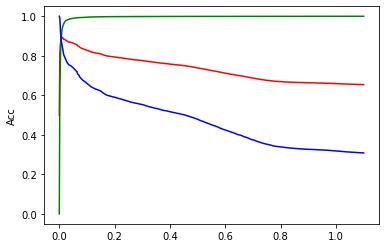

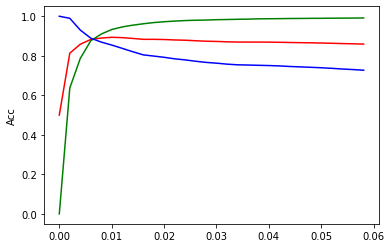

In [8]:
%run Find_threshold.py

蓝线：对攻击数据的识别率。（国六要求95%）

绿线：对正常数据的识别率。（国六要求99%）

红线：总体准确率。（攻击数据与正常数据1:1）

### 方法二：全连接分类器 Fully Connected Classifier

使用神经网络构建分类器。学术界对于NSL-KDD数据集往往使用特征提取，再进行监督式学习的方法。而本实验对监督式学习的需求较低。分类器本质上是对低值数据（参数上欧氏距离低的）和高值数据进行分类。所以分类器一经训练好就不再需要更改。

实验时间：2019/10/17

In [4]:
%run classifier.py

Train on 16060 samples, validate on 4016 samples
Epoch 1/5000
16060/16060 [==============================] - 1s 64us/step - loss: 0.0912 - acc: 0.9649 - val_loss: 0.2003 - val_acc: 0.9295
Epoch 2/5000
16060/16060 [==============================] - 1s 36us/step - loss: 0.0949 - acc: 0.9614 - val_loss: 0.1357 - val_acc: 0.9654
Epoch 3/5000
16060/16060 [==============================] - 1s 39us/step - loss: 0.0895 - acc: 0.9656 - val_loss: 0.2479 - val_acc: 0.9111
Epoch 4/5000
16060/16060 [==============================] - 1s 36us/step - loss: 0.0896 - acc: 0.9641 - val_loss: 0.1494 - val_acc: 0.9514
Epoch 5/5000
16060/16060 [==============================] - 1s 32us/step - loss: 0.0904 - acc: 0.9649 - val_loss: 0.1744 - val_acc: 0.9363
Epoch 6/5000
16060/16060 [==============================] - 1s 33us/step - loss: 0.0876 - acc: 0.9667 - val_loss: 0.1370 - val_acc: 0.9624
Epoch 7/5000
16060/16060 [==============================] - 1s 32us/step - loss: 0.0894 - acc: 0.9654 - val_loss: 0.1

16060/16060 [==============================] - 1s 33us/step - loss: 0.0850 - acc: 0.9675 - val_loss: 0.1215 - val_acc: 0.9646
Epoch 60/5000
16060/16060 [==============================] - 1s 34us/step - loss: 0.0840 - acc: 0.9671 - val_loss: 0.1455 - val_acc: 0.9587
Epoch 61/5000
16060/16060 [==============================] - 1s 38us/step - loss: 0.0802 - acc: 0.9704 - val_loss: 0.1301 - val_acc: 0.9641
Epoch 62/5000
16060/16060 [==============================] - 1s 34us/step - loss: 0.0776 - acc: 0.9715 - val_loss: 0.1916 - val_acc: 0.9387
Epoch 63/5000
16060/16060 [==============================] - 1s 34us/step - loss: 0.0886 - acc: 0.9667 - val_loss: 0.1810 - val_acc: 0.9358
Epoch 64/5000
16060/16060 [==============================] - 1s 38us/step - loss: 0.0862 - acc: 0.9685 - val_loss: 0.1460 - val_acc: 0.9552
Epoch 65/5000
16060/16060 [==============================] - 1s 35us/step - loss: 0.0836 - acc: 0.9684 - val_loss: 0.1940 - val_acc: 0.9340
Epoch 66/5000
16060/16060 [=======

16060/16060 [==============================] - 0s 29us/step - loss: 0.0744 - acc: 0.9720 - val_loss: 0.2191 - val_acc: 0.9308
Epoch 118/5000
16060/16060 [==============================] - 0s 30us/step - loss: 0.0767 - acc: 0.9714 - val_loss: 0.1766 - val_acc: 0.9514
Epoch 119/5000
16060/16060 [==============================] - 0s 30us/step - loss: 0.0756 - acc: 0.9718 - val_loss: 0.1572 - val_acc: 0.9617
Epoch 120/5000
16060/16060 [==============================] - 0s 30us/step - loss: 0.0820 - acc: 0.9700 - val_loss: 0.1429 - val_acc: 0.9604
Epoch 121/5000
16060/16060 [==============================] - 0s 31us/step - loss: 0.0856 - acc: 0.9679 - val_loss: 0.1220 - val_acc: 0.9651
Epoch 122/5000
16060/16060 [==============================] - 0s 31us/step - loss: 0.0820 - acc: 0.9691 - val_loss: 0.1543 - val_acc: 0.9572
Epoch 123/5000
16060/16060 [==============================] - 1s 32us/step - loss: 0.0746 - acc: 0.9731 - val_loss: 0.2645 - val_acc: 0.9131
Epoch 124/5000
16060/16060 [

In [1]:
%run classifier.py

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 16060 samples, validate on 4016 samples
Epoch 1/5000
16060/16060 [==============================] - 1s 74us/step - loss: 0.1297 - acc: 0.9442 - val_loss: 0.2166 - val_acc: 0.8974
Epoch 2/5000
16060/16060 [==============================] - 1s 37us/step - loss: 0.1262 - acc: 0.9453 - val_loss: 0.1737 - val_acc: 0.9390
Epoch 3/5000
16060/16060 [==============================] - 1s 35us/step - loss: 0.1256 - acc: 0.9469 - val_loss: 0.1810 - val_acc: 0.9363
Epoch 4/5000
16060/16060 [==============================] - 1s 35us/step - loss: 0.1234 - acc: 0.9487 - val_loss: 0.2189 - val_acc: 0.8997
Epoch 5/5000
16060/16060 [==============================] - 1s 34us/step - loss: 0.1225 - acc: 0.9467 - val_loss: 0.1722 - val_acc: 0.9437
Epoch 6/5000
16060/16060 [==============================] - 1s 33us/step - loss: 0.1214 - acc: 0.9486 - val_loss: 0.1603 - val_acc: 0.9504
Epoch 7/5000
1606

16060/16060 [==============================] - 0s 31us/step - loss: 0.1011 - acc: 0.9613 - val_loss: 0.1711 - val_acc: 0.9477
Epoch 50/5000
16060/16060 [==============================] - 1s 31us/step - loss: 0.0998 - acc: 0.9605 - val_loss: 0.1423 - val_acc: 0.9579
Epoch 51/5000
16060/16060 [==============================] - 1s 32us/step - loss: 0.1015 - acc: 0.9585 - val_loss: 0.1966 - val_acc: 0.9243
Epoch 52/5000
16060/16060 [==============================] - 0s 31us/step - loss: 0.1004 - acc: 0.9602 - val_loss: 0.1662 - val_acc: 0.9387
Epoch 53/5000
16060/16060 [==============================] - 1s 31us/step - loss: 0.1017 - acc: 0.9588 - val_loss: 0.1743 - val_acc: 0.9432
Epoch 54/5000
16060/16060 [==============================] - 0s 31us/step - loss: 0.1005 - acc: 0.9598 - val_loss: 0.2054 - val_acc: 0.9056
Epoch 55/5000
16060/16060 [==============================] - 1s 31us/step - loss: 0.1004 - acc: 0.9592 - val_loss: 0.1475 - val_acc: 0.9544
Epoch 56/5000
16060/16060 [=======

16060/16060 [==============================] - 0s 31us/step - loss: 0.0880 - acc: 0.9669 - val_loss: 0.1722 - val_acc: 0.9442
Epoch 108/5000
16060/16060 [==============================] - 1s 33us/step - loss: 0.0886 - acc: 0.9654 - val_loss: 0.1407 - val_acc: 0.9579
Epoch 109/5000
16060/16060 [==============================] - 0s 31us/step - loss: 0.0870 - acc: 0.9679 - val_loss: 0.2104 - val_acc: 0.9265
Epoch 110/5000
16060/16060 [==============================] - 1s 31us/step - loss: 0.0882 - acc: 0.9669 - val_loss: 0.1233 - val_acc: 0.9666
Epoch 111/5000
16060/16060 [==============================] - 1s 31us/step - loss: 0.0857 - acc: 0.9683 - val_loss: 0.1496 - val_acc: 0.9549
Epoch 112/5000
16060/16060 [==============================] - 0s 31us/step - loss: 0.0872 - acc: 0.9660 - val_loss: 0.1739 - val_acc: 0.9407
Epoch 113/5000
16060/16060 [==============================] - 1s 31us/step - loss: 0.0863 - acc: 0.9686 - val_loss: 0.2105 - val_acc: 0.9241
Epoch 114/5000
16060/16060 [

16060/16060 [==============================] - 1s 32us/step - loss: 0.0782 - acc: 0.9709 - val_loss: 0.1533 - val_acc: 0.9514
Epoch 166/5000
16060/16060 [==============================] - 1s 32us/step - loss: 0.0767 - acc: 0.9714 - val_loss: 0.1557 - val_acc: 0.9485
Epoch 167/5000
16060/16060 [==============================] - 1s 34us/step - loss: 0.0774 - acc: 0.9720 - val_loss: 0.1320 - val_acc: 0.9614
Epoch 168/5000
16060/16060 [==============================] - 0s 30us/step - loss: 0.0770 - acc: 0.9715 - val_loss: 0.1371 - val_acc: 0.9584
Epoch 169/5000
16060/16060 [==============================] - 0s 30us/step - loss: 0.0771 - acc: 0.9714 - val_loss: 0.1323 - val_acc: 0.9584
Epoch 170/5000
16060/16060 [==============================] - 0s 30us/step - loss: 0.0786 - acc: 0.9704 - val_loss: 0.1328 - val_acc: 0.9594
Epoch 171/5000
16060/16060 [==============================] - 0s 30us/step - loss: 0.0767 - acc: 0.9724 - val_loss: 0.1484 - val_acc: 0.9572
Epoch 172/5000
16060/16060 [

可以看到，分类器无论是对攻击数据（True Positive rate）还是正常数据（True Negative rate）的识别率都已经达到了很高。

但训练仍然存在数据不平衡的问题。（主要是因为训练数据中的攻击数据依然远多于实际情况）这个问题可以使用分类器的输出阈值来调整。

Threshold = 0.6

In [10]:
%run classifier.py

Train on 16060 samples, validate on 4016 samples
Epoch 1/5000
16060/16060 [==============================] - 1s 61us/step - loss: 0.0814 - acc: 0.9699 - val_loss: 0.1736 - val_acc: 0.9437
Epoch 2/5000
16060/16060 [==============================] - 1s 38us/step - loss: 0.0810 - acc: 0.9704 - val_loss: 0.2170 - val_acc: 0.9328
Epoch 3/5000
16060/16060 [==============================] - 1s 34us/step - loss: 0.0805 - acc: 0.9691 - val_loss: 0.1464 - val_acc: 0.9579
Epoch 4/5000
16060/16060 [==============================] - 1s 35us/step - loss: 0.0803 - acc: 0.9707 - val_loss: 0.1177 - val_acc: 0.9674
Epoch 5/5000
16060/16060 [==============================] - 1s 37us/step - loss: 0.0807 - acc: 0.9692 - val_loss: 0.1785 - val_acc: 0.9455
Epoch 6/5000
16060/16060 [==============================] - 1s 35us/step - loss: 0.0804 - acc: 0.9696 - val_loss: 0.1268 - val_acc: 0.9612
Epoch 7/5000
16060/16060 [==============================] - 1s 33us/step - loss: 0.0794 - acc: 0.9707 - val_loss: 0.1

Epoch 59/5000
16060/16060 [==============================] - 0s 31us/step - loss: 0.0722 - acc: 0.9737 - val_loss: 0.1649 - val_acc: 0.9500
Epoch 60/5000
16060/16060 [==============================] - 1s 32us/step - loss: 0.0734 - acc: 0.9717 - val_loss: 0.1197 - val_acc: 0.9639
Epoch 61/5000
16060/16060 [==============================] - 1s 34us/step - loss: 0.0744 - acc: 0.9725 - val_loss: 0.1536 - val_acc: 0.9542
Epoch 62/5000
16060/16060 [==============================] - 1s 32us/step - loss: 0.0744 - acc: 0.9729 - val_loss: 0.1641 - val_acc: 0.9472
Epoch 63/5000
16060/16060 [==============================] - 1s 31us/step - loss: 0.0727 - acc: 0.9737 - val_loss: 0.1586 - val_acc: 0.9527
Epoch 64/5000
16060/16060 [==============================] - 0s 31us/step - loss: 0.0719 - acc: 0.9733 - val_loss: 0.1640 - val_acc: 0.9507
Epoch 65/5000
16060/16060 [==============================] - 1s 32us/step - loss: 0.0748 - acc: 0.9722 - val_loss: 0.2090 - val_acc: 0.9318
Epoch 66/5000
16060/

通过设定阈值可以将准确率向一边偏移。这与方法一近乎同理。但分类器显然准确率更高。

In [2]:
%run classifier_v2.py

Train on 12860 samples, validate on 3216 samples
Epoch 1/5000
12860/12860 [==============================] - 1s 56us/step - loss: 0.2632 - acc: 0.9442 - val_loss: 0.5613 - val_acc: 0.7491
Epoch 2/5000
12860/12860 [==============================] - 0s 34us/step - loss: 0.1835 - acc: 0.9435 - val_loss: 0.6475 - val_acc: 0.7410
Epoch 3/5000
12860/12860 [==============================] - 0s 37us/step - loss: 0.1781 - acc: 0.9452 - val_loss: 0.4812 - val_acc: 0.7727
Epoch 4/5000
12860/12860 [==============================] - 0s 35us/step - loss: 0.1751 - acc: 0.9460 - val_loss: 0.5031 - val_acc: 0.7724
Epoch 5/5000
12860/12860 [==============================] - 0s 30us/step - loss: 0.1724 - acc: 0.9466 - val_loss: 0.4838 - val_acc: 0.7842
Epoch 6/5000
12860/12860 [==============================] - 0s 30us/step - loss: 0.1687 - acc: 0.9473 - val_loss: 0.4679 - val_acc: 0.7954
Epoch 7/5000
12860/12860 [==============================] - 0s 34us/step - loss: 0.1689 - acc: 0.9481 - val_loss: 0.5

Epoch 59/5000
12860/12860 [==============================] - 0s 31us/step - loss: 0.1314 - acc: 0.9564 - val_loss: 0.5156 - val_acc: 0.8259
Epoch 60/5000
12860/12860 [==============================] - 0s 32us/step - loss: 0.1291 - acc: 0.9574 - val_loss: 0.4275 - val_acc: 0.8318
Epoch 61/5000
12860/12860 [==============================] - 0s 34us/step - loss: 0.1287 - acc: 0.9569 - val_loss: 0.3824 - val_acc: 0.8442
Epoch 62/5000
12860/12860 [==============================] - 0s 31us/step - loss: 0.1290 - acc: 0.9576 - val_loss: 0.4549 - val_acc: 0.8231
Epoch 63/5000
12860/12860 [==============================] - 0s 33us/step - loss: 0.1266 - acc: 0.9574 - val_loss: 0.4276 - val_acc: 0.8408
Epoch 64/5000
12860/12860 [==============================] - 0s 31us/step - loss: 0.1297 - acc: 0.9577 - val_loss: 0.3486 - val_acc: 0.8492
Epoch 65/5000
12860/12860 [==============================] - 0s 32us/step - loss: 0.1284 - acc: 0.9571 - val_loss: 0.4000 - val_acc: 0.8287
Epoch 66/5000
12860/

12860/12860 [==============================] - 0s 35us/step - loss: 0.1014 - acc: 0.9615 - val_loss: 0.4013 - val_acc: 0.8221
Epoch 118/5000
12860/12860 [==============================] - 0s 35us/step - loss: 0.1017 - acc: 0.9622 - val_loss: 0.3758 - val_acc: 0.8333
Epoch 119/5000
12860/12860 [==============================] - 0s 33us/step - loss: 0.0989 - acc: 0.9613 - val_loss: 0.3271 - val_acc: 0.8520
Epoch 120/5000
12860/12860 [==============================] - 0s 33us/step - loss: 0.0982 - acc: 0.9605 - val_loss: 0.3106 - val_acc: 0.8644
Epoch 121/5000
12860/12860 [==============================] - 0s 35us/step - loss: 0.0980 - acc: 0.9603 - val_loss: 0.3349 - val_acc: 0.8433
Epoch 122/5000
12860/12860 [==============================] - 0s 33us/step - loss: 0.0954 - acc: 0.9608 - val_loss: 0.2427 - val_acc: 0.8946
Epoch 123/5000
12860/12860 [==============================] - 0s 38us/step - loss: 0.0959 - acc: 0.9610 - val_loss: 0.3005 - val_acc: 0.8567
Epoch 124/5000
12860/12860 [

12860/12860 [==============================] - 0s 31us/step - loss: 0.0866 - acc: 0.9648 - val_loss: 0.3099 - val_acc: 0.8616
Epoch 176/5000
12860/12860 [==============================] - 0s 30us/step - loss: 0.0833 - acc: 0.9663 - val_loss: 0.2592 - val_acc: 0.8999
Epoch 177/5000
12860/12860 [==============================] - 0s 31us/step - loss: 0.0830 - acc: 0.9669 - val_loss: 0.2693 - val_acc: 0.8915
Epoch 178/5000
12860/12860 [==============================] - 0s 32us/step - loss: 0.0836 - acc: 0.9652 - val_loss: 0.3218 - val_acc: 0.8703
Epoch 179/5000
12860/12860 [==============================] - 0s 32us/step - loss: 0.0836 - acc: 0.9662 - val_loss: 0.4322 - val_acc: 0.8433
Epoch 180/5000
12860/12860 [==============================] - 0s 31us/step - loss: 0.0830 - acc: 0.9663 - val_loss: 0.2537 - val_acc: 0.8946
Epoch 181/5000
12860/12860 [==============================] - 0s 32us/step - loss: 0.0797 - acc: 0.9673 - val_loss: 0.2647 - val_acc: 0.8955
Epoch 182/5000
12860/12860 [

在训练集中减少一部分攻击数据的数据量，效果与改变阈值类似，但由于数据实实在在减少了，总体准确率下降。但在实际情况中，正常数据远多于攻击数据，分类器的训练会自然向更高的True Negative rate偏移。而对攻击数据的识别已经达到了国六要求，所以该实验前景还是乐观的。

## 第四部分：总结

本次实验通过使用Autoencoder对正常数据编码再解码的方法，得到了一个只能还原正常数据的神经网络，从而查找出无法还原的异常数据。该方法在本实验的测试数据上达到了95%以上的准确率。但以国六的要求，模型仍然在误报率上较高，这也是神经网络对于不平衡数据固有的困难。但是本次实验初步验证了云端非监督可迭代模型对异常检测的可行性，且实验中的网络还未进行进一步优化。且作为整个IDPS网络的一部分，还是有其作用的。

还有一个思路，既是将该网络用作第一道防火墙，将被识别的阳性数据（True Positive + False Positive）收集等待下一步检测。这样大大降低了数据的不平衡（如4%的误报数据与96%的攻击数据可能可以被拉到相似的数量级），使之后更准确的识别成为可能。